### IPL

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
os.listdir(".")

['.ipynb_checkpoints',
 'deliveries.csv',
 'IPL -- Mohit -- 1.ipynb',
 'matches.csv']

In [2]:
%pwd

u'C:\\Users\\A505829\\Anaconda2\\Mohit\\Kaggle\\06 IPL'

In [3]:
matches=pd.read_csv('matches.csv')   
delivery=pd.read_csv('deliveries.csv')

In [4]:
print matches.shape
print matches.info()

(636, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB
None


In [5]:
matches.drop(["umpire3"],axis=1,inplace=True)

In [6]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [7]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [8]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'], inplace=True)

In [9]:
delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [10]:
print "Total matchs played :", format(matches.shape[0])
print "\n Total Teams : ", matches.team1.nunique(),  "and  List of Teams : ", matches.team1.unique() 
print "\n Total Venue : ", matches.city.nunique(),  "and  List are : ", matches.city.unique() 
print "\n Total Umpire :", matches.umpire1.nunique()

Total matchs played : 636

 Total Teams :  13 and  List of Teams :  ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']

 Total Venue :  30 and  List are :  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]

 Total Umpire : 44


In [11]:
print "Won Max matches", matches.winner.value_counts().sort_values(ascending=False)[:1]
print "Max Man of the  matchs : ", (matches.player_of_match.value_counts()).idxmax()


Won Max matches MI    92
Name: winner, dtype: int64
Max Man of the  matchs :  CH Gayle


In [12]:
matches.iloc[[matches.win_by_runs.idxmax()]]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,MI,DD,DD,field,normal,0,MI,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


In [13]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


In [14]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


### Toss Decision

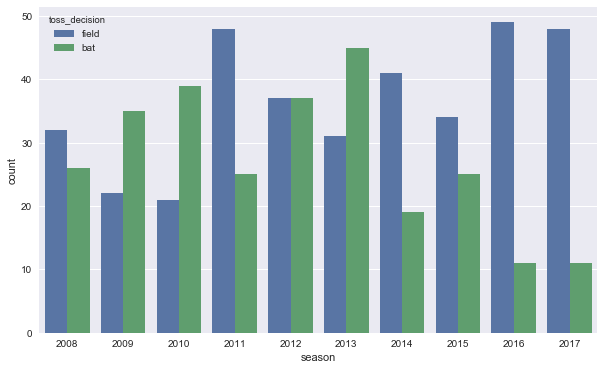

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(hue="toss_decision", x="season", data=matches)   
        

The decision for batting or fielding varies largely across the seasons. In some seasons, the probablity that toss winners opt for batting is high, while it is not the case in other seasons. In 2016 though, the majority of toss winners opted for batting.

### Maximum Toss Winners


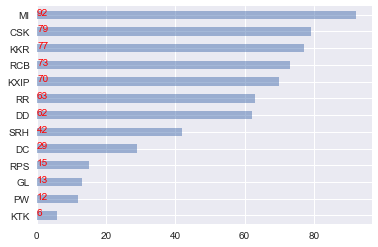

In [16]:
ax=matches.winner.value_counts().sort_values(ascending=True).plot.barh(alpha=.5)
for i,v in enumerate(matches.winner.value_counts().sort_values(ascending=True)):
    ax.text(0.1,i,v,color='r')


In [17]:
pd.crosstab(matches.winner, matches.season,margins=True).style.background_gradient(cmap='summer_r')

Mumbai Indians seem to be very lucky having the higest win in tosses follwed by Kolkata Knight Riders. Pune Supergiants have the lowest wins as they have played the lowest matches also. This does not show the higher chances of winning the toss as the number of matches played by each team is uneven.

### Total Matches vs Wins for Teams

In [18]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)
matches_played_byteams.head(2)

,Total Matches,wins
Team,,
MI,157,92
RCB,152,79


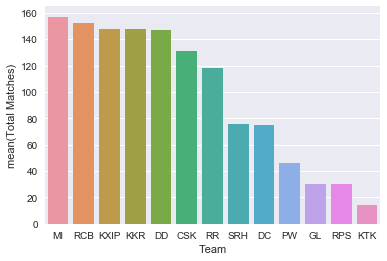

In [19]:

fig=sns.barplot(x=matches_played_byteams.index,y=matches_played_byteams.wins)
sns.barplot(x=matches_played_byteams.index,y=matches_played_byteams["Total Matches"], ax=fig)

plt.show()

### Is Toss Winner Also the Match Winner?

In [20]:
df=matches[matches['toss_winner']==matches['winner']]
slice=[len(df), (577-len(df))]
slice1=pd.DataFrame(slice).T
slice1.columns=["win","Loose"]

([<matplotlib.patches.Wedge at 0x1520b048>,
 [<matplotlib.text.Text at 0x1520b940>, <matplotlib.text.Text at 0x1521ba58>],
 [<matplotlib.text.Text at 0x1520bd68>, <matplotlib.text.Text at 0x1521be10>])

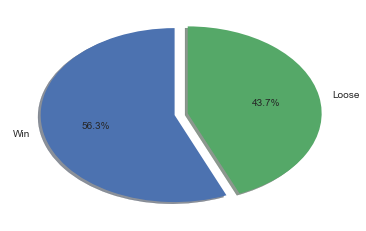

In [21]:
Lables=["Win","Loose"]
plt.pie(slice, autopct="%1.1f%%", labels=Lables, shadow=True, startangle=90,explode=(0,0.1))

### Matches played across each season

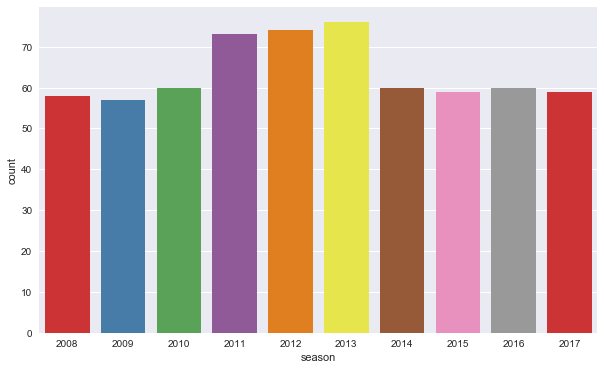

In [22]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette="Set1")  #countplot automatically counts the frequency of an item

### Runs Across the Seasons

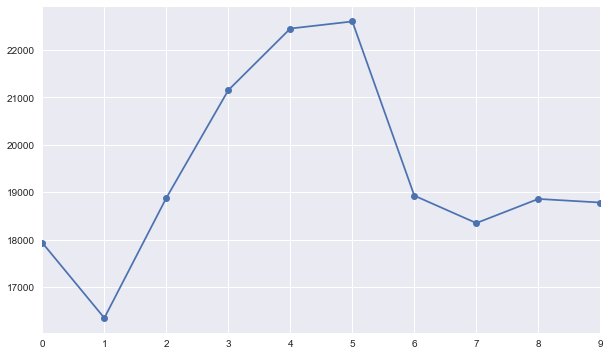

In [23]:
plt.subplots(figsize=(10,6))
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season['total_runs'].plot(marker='o')


There was a decline in total runs from 2008 to 2009.But there after there was a substantial increase in runs in every season until 2013, but from next season there was a slump in the total runs. But the number of matches are not equal in all seasons. We should check the average runs per match in each season

### Average runs per match in each Season

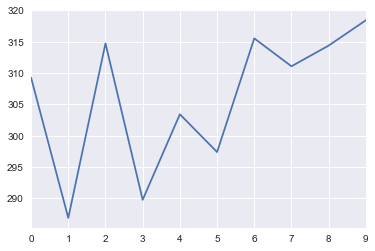

In [24]:
avgruns_each_season=matches.groupby(['season'])["id"].count().reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season['average_runs_per_match'].plot()

In [25]:
avgruns_each_season

,season,matches,total_runs,average_runs_per_match
0,2008,58,17937,309.258621
1,2009,57,16353,286.894737
2,2010,60,18883,314.716667
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,60,18931,315.516667
7,2015,59,18353,311.067797
8,2016,60,18862,314.366667
9,2017,59,18786,318.406780


### Sixes and Fours Across the Season

In [26]:
batsmen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150460 entries, 0 to 150459
Data columns (total 22 columns):
season              150460 non-null int64
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fiel

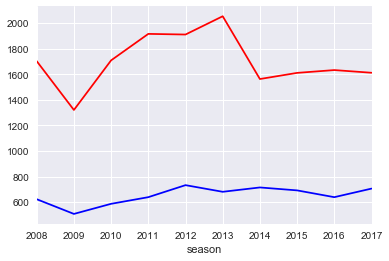

In [38]:
batsmen[batsmen.batsman_runs==6].groupby(["season"])["batsman_runs"].count().plot(label='six', color='b')
batsmen[batsmen.batsman_runs==4].groupby(["season"])["batsman_runs"].count().plot(label='six', color='r')

### Runs Per Over By Teams Across Seasons

In [43]:
batsmen.groupby(["season","batting_team"])["batsman_runs"].count().reset_index()


,season,batting_team,batsman_runs
0,2008,CSK,1874
1,2008,DC,1668
2,2008,DD,1547
3,2008,KKR,1557
4,2008,KXIP,1739
5,2008,MI,1584
6,2008,RCB,1659
7,2008,RR,1861
8,2009,CSK,1709
9,2009,DC,1890


In [46]:
 delivery.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)

batting_team,CSK,DC,DD,GL,KKR,KTK,KXIP,MI,PW,RCB,RPS,RR,SRH
over,,,,,,,,,,,,,
1,684,482,931,209,999,103,909,873,264,918,163,713,485
2,944,614,1124,226,1093,96,1057,1038,301,1007,200,740,553
3,1020,566,1140,294,1153,115,1144,1153,357,1210,250,848,602
4,1086,571,1192,269,1198,126,1228,1251,329,1184,246,936,591
5,1140,586,1209,267,1180,97,1229,1265,316,1171,262,874,631
6,1147,598,1069,294,1132,143,1287,1366,328,1138,302,954,639
7,909,472,1049,259,985,89,990,1013,246,935,198,776,492
8,970,539,1010,249,965,86,1130,1063,317,1117,201,826,493
9,980,519,1095,242,1010,88,1093,1111,296,1192,203,873,545


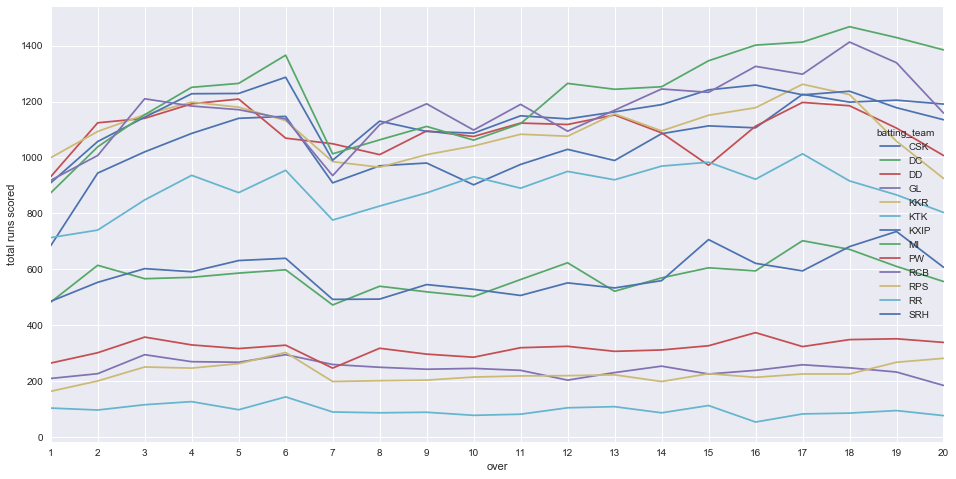

In [50]:
runs_per_over = delivery.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over.plot()
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,8)


In [51]:
matches_played_byteams

,Total Matches,wins
Team,,
MI,157,92
RCB,152,79
KXIP,148,77
KKR,148,73
DD,147,70
CSK,131,63
RR,118,62
SRH,76,42
DC,75,29


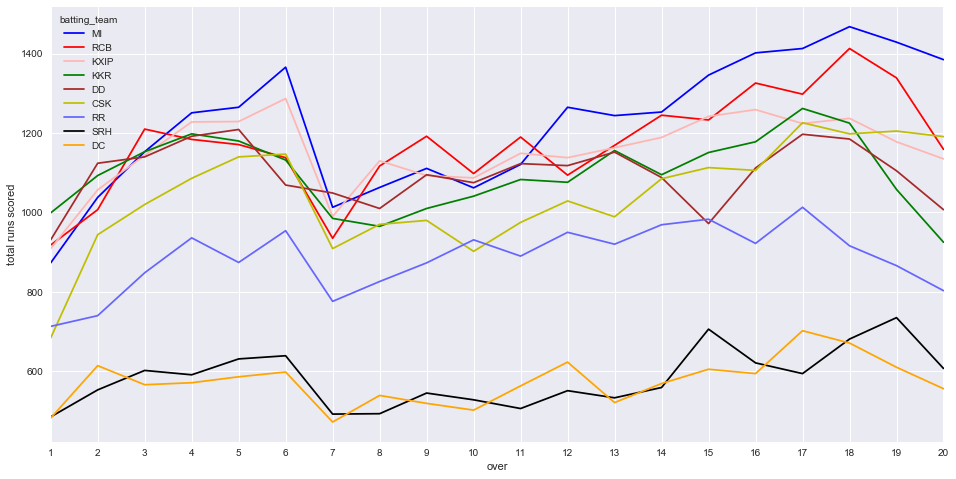

In [52]:
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,8)

Maximum runs are being scored in the last 5 overs of the match. MI and RCB have shown a incresing trend in the runs scored throughout the match.

### Favorite Grounds

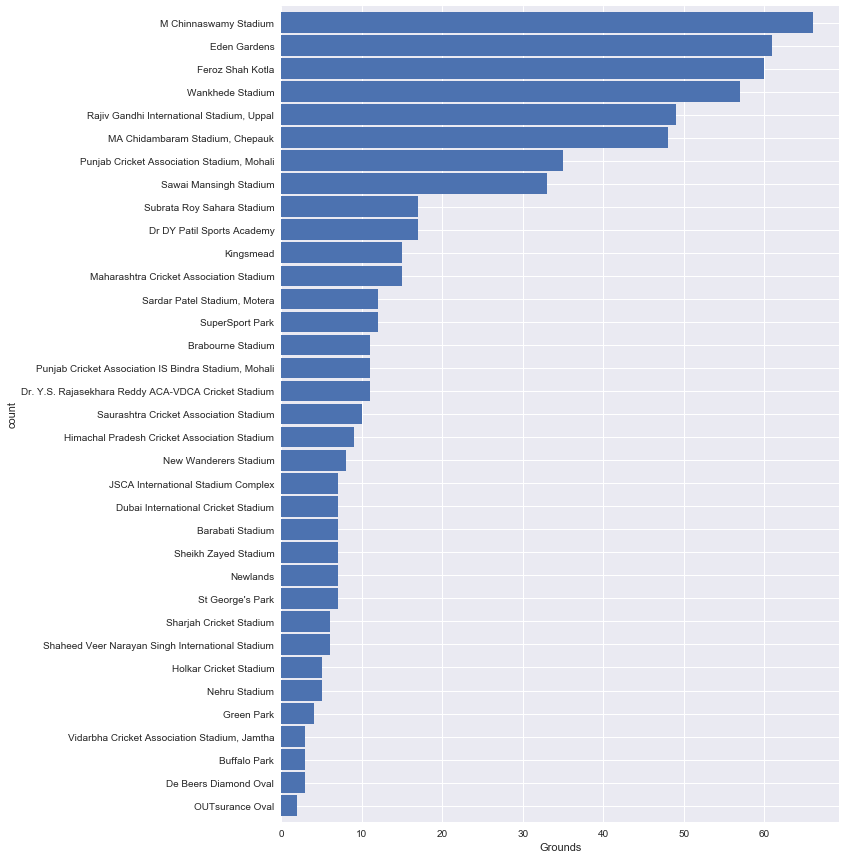

In [54]:
plt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9)
ax.set_xlabel('Grounds')
ax.set_ylabel('count')


### Maximum Man Of Matches

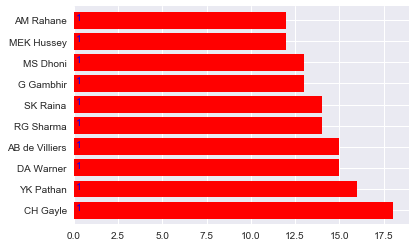

In [65]:
ax=matches['player_of_match'].value_counts().head(10).plot.barh(width=.8, color='R') 
for i,v in enumerate (matches['player_of_match'].head(10).value_counts().sort_values(ascending=True)):
    ax.text(0.1,i,v,color='b')

### Winners by Year

In [66]:
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]])

season    2008
winner      RR
Name: 116, dtype: object
season    2009
winner      DC
Name: 173, dtype: object
season    2010
winner     CSK
Name: 233, dtype: object
season    2011
winner     CSK
Name: 306, dtype: object
season    2012
winner     KKR
Name: 380, dtype: object
season    2013
winner      MI
Name: 456, dtype: object
season    2014
winner     KKR
Name: 516, dtype: object
season    2015
winner      MI
Name: 575, dtype: object
season    2016
winner     SRH
Name: 635, dtype: object
